In [3]:
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt

# Loading data
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

# Data Cleaning
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])

c:\Users\mohammad mujahiddin\AppData\Local\Programs\Python\Python312\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [11]:
df_exploded = df.explode('job_skills')

In [10]:
skill_count = df_exploded.groupby(['job_skills', 'job_title_short']).size()
skill_count

job_skills                                                  job_title_short          
['airflow', 'confluence']                                   Data Engineer                 1
['airflow', 'datarobot', 'docker', 'kubernetes']            Senior Data Engineer          1
['airflow', 'docker', 'gitlab', 'kubernetes']               Machine Learning Engineer     1
['airflow', 'docker', 'kubernetes', 'terraform', 'gitlab']  Data Engineer                 1
['airflow', 'docker', 'kubernetes']                         Data Analyst                  1
                                                                                         ..
['zoom']                                                    Data Engineer                10
                                                            Data Scientist               43
                                                            Senior Data Analyst           2
                                                            Senior Data Scientist     

KeyboardInterrupt: 

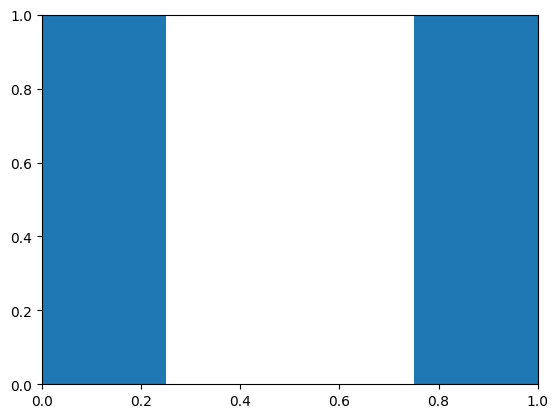

In [5]:
df_exploded.value_counts('job_skills').plot(kind='bar')

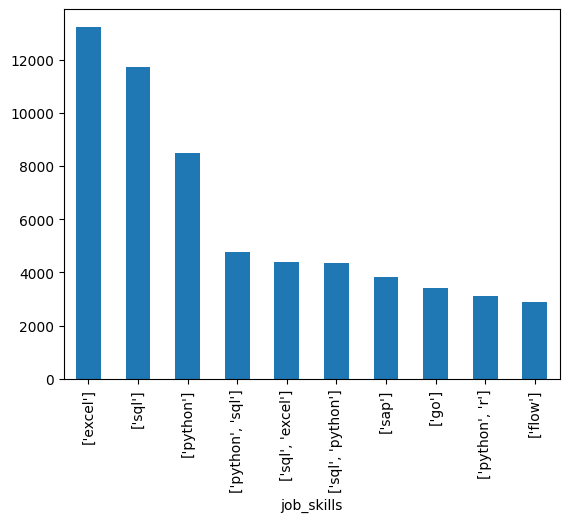

In [6]:
df_exploded['job_skills'].value_counts().head(10).plot(kind='bar')
plt.show()

In [13]:

data = {
    'job_title_short': ['Data Analyst', 'Data Scientist', 'Data Engineer'],
    'job_skills': [['excel', 'sql', 'python'], ['python', 'r'], ['aws', 'python', 'airflow']]
}

df_skills = pd.DataFrame(data)

df_skills

,job_title_short,job_skills
0,Data Analyst,"[excel, sql, python]"
1,Data Scientist,"[python, r]"
2,Data Engineer,"[aws, python, airflow]"


In [14]:
# Explode job_skills column
df_skills = df_skills.explode('job_skills')

In [15]:

# Group by job_skills and job_title_short and count the number of occurrences
skills_count = df_skills.groupby(['job_skills', 'job_title_short']).size()

print('Type of skills_count: ', type(skills_count))
skills_count

Type of skills_count:  <class 'pandas.core.series.Series'>


job_skills  job_title_short
airflow     Data Engineer      1
aws         Data Engineer      1
excel       Data Analyst       1
python      Data Analyst       1
            Data Engineer      1
            Data Scientist     1
r           Data Scientist     1
sql         Data Analyst       1
dtype: int64

In [16]:
# Name the count column as count
df_skills_count = skills_count.reset_index(name='skill_count') # we need to rename the main Series value to count

df_skills_count

,job_skills,job_title_short,skill_count
0,airflow,Data Engineer,1
1,aws,Data Engineer,1
2,excel,Data Analyst,1
3,python,Data Analyst,1
4,python,Data Engineer,1
5,python,Data Scientist,1
6,r,Data Scientist,1
7,sql,Data Analyst,1


In [17]:

df_skills_count.sort_values(by='skill_count',  inplace=True)

df_skills_count


,job_skills,job_title_short,skill_count
0,airflow,Data Engineer,1
1,aws,Data Engineer,1
2,excel,Data Analyst,1
3,python,Data Analyst,1
4,python,Data Engineer,1
5,python,Data Scientist,1
6,r,Data Scientist,1
7,sql,Data Analyst,1


In [20]:
job_title = 'Data Analyst'
head_value = 10

df_skill_final = df_skills_count[df_skills_count['job_title_short'] == job_title].head(head_value)

df_skill_final

,job_skills,job_title_short,skill_count
2,excel,Data Analyst,1
3,python,Data Analyst,1
7,sql,Data Analyst,1


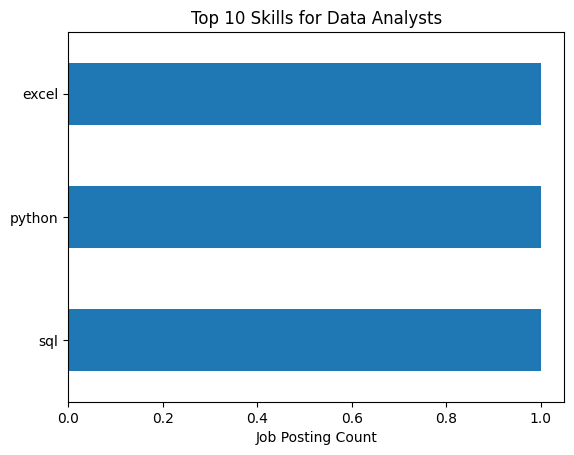

In [21]:
df_skill_final.plot(kind='barh', x='job_skills', y='skill_count')
plt.xlabel('Job Posting Count')
plt.ylabel('')
plt.title(f'Top {head_value} Skills for {job_title}s')
plt.gca().invert_yaxis()  # To display the highest value on top
plt.legend().set_visible(False)
plt.show()